In [ ]:
#import libraries
import re 
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from collections import Counter
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from wordcloud import WordCloud
from textwrap import wrap
import joblib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Input Data and Data Cleaning

In [ ]:
data = pd.read_csv('./Data Mood Analysis.csv')
data.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
data.shape

(20000, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     20000 non-null  object
 1   Emotion  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [ ]:
data.describe(include='object')

,Text,Emotion
count,20000,20000
unique,19948,6
top,i will feel as though i am accepted by as well...,joy
freq,2,6761


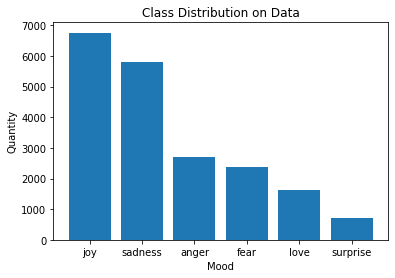


joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: Emotion, dtype: int64


In [ ]:
plt.bar(data['Emotion'].unique(),height=data['Emotion'].value_counts())
plt.xticks(np.arange(6), data['Emotion'].value_counts().index)
plt.ylabel('Quantity')
plt.xlabel('Mood')
plt.title("Class Distribution on Data")
plt.show()

print('')
print(data['Emotion'].value_counts())

In [ ]:
data['Text'][:10].values

array(['i didnt feel humiliated',
       'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
       'im grabbing a minute to post i feel greedy wrong',
       'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
       'i am feeling grouchy',
       'ive been feeling a little burdened lately wasnt sure why that was',
       'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
       'i feel as confused about life as a teenager or as jaded as a year old man',
       'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
       'i feel romantic too'], dtype=object)

In [ ]:
stop_words = stopwords.words('english')
cleaned_data = []

#clean text: remove punctuatinos, lowercase, split, stemming, and remove stopwords
for i in range(len(data)):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['Text']) 
  review = review.lower().split() #lowercase dan split

  review = [word for word in review if (word not in stop_words)] 
  review = ' '.join(review) 
    
  cleaned_data.append(review)

In [ ]:
data['Text'][:5].values

array(['i didnt feel humiliated',
       'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
       'im grabbing a minute to post i feel greedy wrong',
       'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
       'i am feeling grouchy'], dtype=object)

In [ ]:
cleaned_data[:5]

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone cares awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy']

In [ ]:
data2 = data.copy()
data2['Text'] = cleaned_data
data2.head()

,Text,Emotion
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger


## Word Cloud

In [ ]:
df_grouped = data2.groupby(by='Emotion').agg(lambda x:' '.join(x))
df_grouped.head()

,Text
Emotion,
anger,im grabbing minute post feel greedy wrong feel...
fear,feel confused life teenager jaded year old man...
joy,petronas years feel petronas performed well ma...
love,ever feeling nostalgic fireplace know still pr...
sadness,didnt feel humiliated go feeling hopeless damn...


In [ ]:
cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(df_grouped['Text'])

df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index = df_grouped.index
df_dtm.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaaaaaand,aaaaand,aaaah,aaaand,aac,aahhh,aaron,ab,abandon,...,zonisamide,zoo,zoom,zooming,zooms,zq,zucchini,zum,zumba,zz
Emotion,,,,,,,,,,,,,,,,,,,,,
anger,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
fear,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
joy,0,1,0,1,1,0,0,0,1,1,...,1,1,0,2,0,0,1,0,2,0
love,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
sadness,1,0,1,0,0,0,0,0,0,1,...,0,0,2,0,1,0,0,1,0,1


In [ ]:
df_dtm.describe()

,aa,aaaaaaand,aaaaand,aaaah,aaaand,aac,aahhh,aaron,ab,abandon,...,zonisamide,zoo,zoom,zooming,zooms,zq,zucchini,zum,zumba,zz
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000
mean,0.500000,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.666667,...,0.166667,0.166667,0.333333,0.333333,0.166667,0.166667,0.166667,0.166667,0.50000,0.166667
std,0.547723,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248,0.516398,...,0.408248,0.408248,0.816497,0.816497,0.408248,0.408248,0.408248,0.408248,0.83666,0.408248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.75000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000


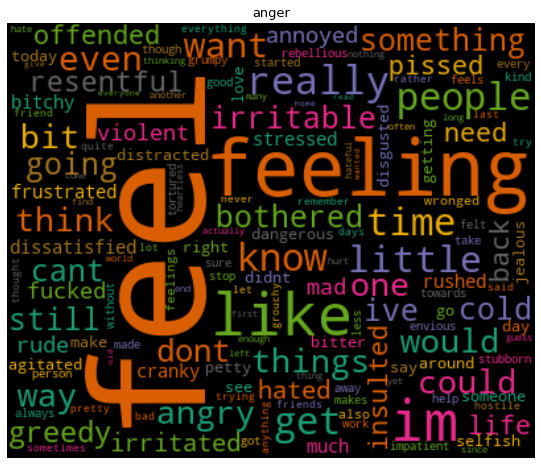

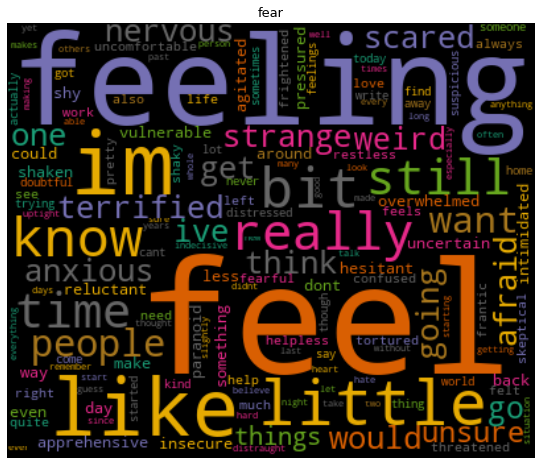

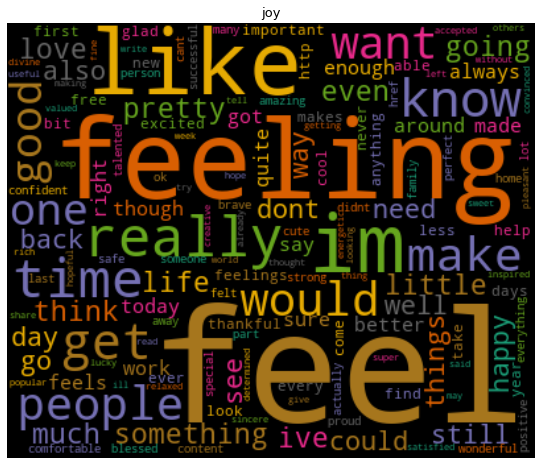

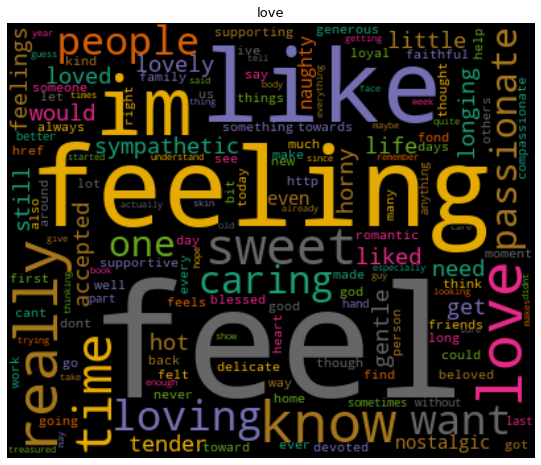

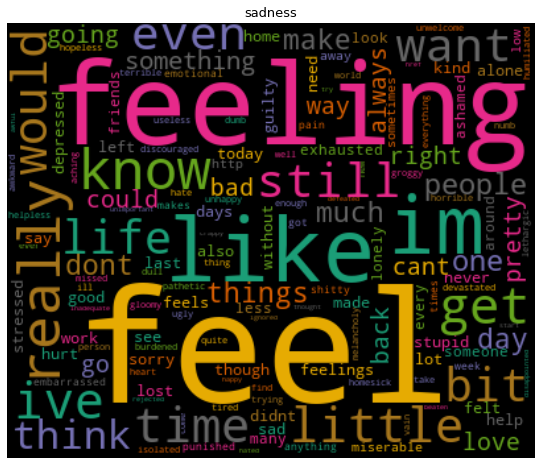

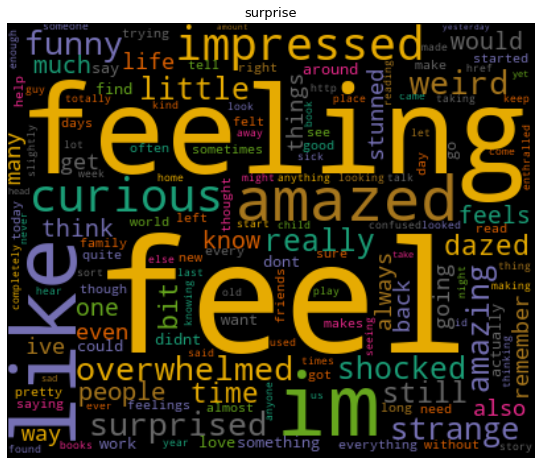

In [ ]:
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)

  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index, rating in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[rating].sort_values(ascending=False), rating)

##Model Training

In [ ]:
X = data2[['Text']]
y = data2[['Emotion']]

label_encode = LabelEncoder().fit(y)

y = label_encode.transform(y)
y[:5]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4, 4, 0, 3, 0])

In [ ]:
## labels
for i in range(len(label_encode.classes_)):
  print(i,'->',label_encode.classes_[i])

0 -> anger
1 -> fear
2 -> joy
3 -> love
4 -> sadness
5 -> surprise


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
print("Shape of x Train :", X_train.shape)
print("Shape of y Train :", Counter(y_train))
print("Shape of x Valid :", X_test.shape)
print("Shape of y Valid :", Counter(y_test))

Shape of x Train : (18000, 1)
Shape of y Train : Counter({2: 6077, 4: 5230, 0: 2437, 1: 2131, 3: 1472, 5: 653})
Shape of x Valid : (2000, 1)
Shape of y Valid : Counter({2: 684, 4: 567, 0: 272, 1: 242, 3: 169, 5: 66})


In [ ]:
vocab_size = 5000
embedding_dim = 16
max_length = 128
trunc_type ='pre'
padding_type ='post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) 
tokenizer.fit_on_texts(X_train['Text']) 
word_index = tokenizer.word_index 
sequences = tokenizer.texts_to_sequences(X_train['Text']) 
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type) 

#for data testing
testing_sequences = tokenizer.texts_to_sequences(X_test['Text']) 
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [ ]:
padded[3]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    3,  400,  470,
        131,   28, 1889, 3147,    1,  720, 1890], dtype=int32)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(X_train.values[3])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? feeling wonder dangerous place could settled mentality <OOV> bring possibility
['feeling wonder dangerous place could settled mentality enmayi bring possibility']


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 16)           80000     
                                                                 
 bidirectional (Bidirectiona  (None, 256)              148480    
 l)                                                              
                                                                 
 dense (Dense)               (None, 6)                 1542      
                                                                 
Total params: 230,022
Trainable params: 230,022
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback = EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True,
)

In [ ]:
history = model.fit(padded,
                    y_train,
                    validation_split=0.1,
                    batch_size=256,
                    epochs=10,
                    callbacks=[callback]
                   )

Epoch 1/10
64/64 [==============================] - 156s 2s/step - loss: 1.5966 - accuracy: 0.3285 - val_loss: 1.5759 - val_accuracy: 0.3478
Epoch 2/10
64/64 [==============================] - 143s 2s/step - loss: 1.5034 - accuracy: 0.4210 - val_loss: 1.4878 - val_accuracy: 0.4700
Epoch 3/10
64/64 [==============================] - 142s 2s/step - loss: 1.0590 - accuracy: 0.6238 - val_loss: 0.9885 - val_accuracy: 0.6311
Epoch 4/10
64/64 [==============================] - 143s 2s/step - loss: 0.7157 - accuracy: 0.7356 - val_loss: 0.7353 - val_accuracy: 0.7333
Epoch 5/10
64/64 [==============================] - 142s 2s/step - loss: 0.7561 - accuracy: 0.7137 - val_loss: 0.7341 - val_accuracy: 0.7317
Epoch 6/10
64/64 [==============================] - 143s 2s/step - loss: 0.5530 - accuracy: 0.7933 - val_loss: 0.6500 - val_accuracy: 0.7706
Epoch 7/10
64/64 [==============================] - 144s 2s/step - loss: 0.4428 - accuracy: 0.8396 - val_loss: 0.5719 - val_accuracy: 0.8083
Epoch 8/10
64

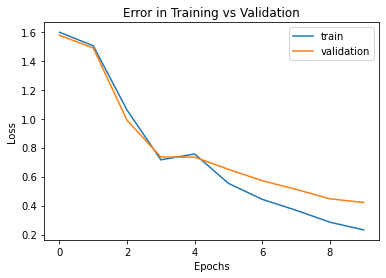

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Error in Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

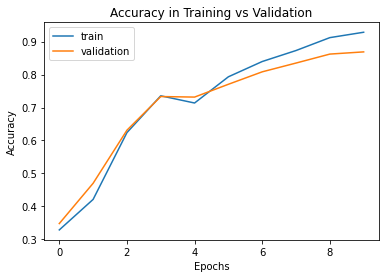

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy in Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
y_dnn = model.predict(testing_padded)
y_dnnfinal = np.argmax(y_dnn, axis=1)
## accuracy score
dnn_acc = accuracy_score(y_test, y_dnnfinal) * 100
print('Accuracy score: {:.2f}%'.format(dnn_acc))

Accuracy score: 89.35%


In [ ]:
print(classification_report(y_test, y_dnnfinal))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       272
           1       0.86      0.86      0.86       242
           2       0.93      0.90      0.92       684
           3       0.73      0.83      0.78       169
           4       0.92      0.96      0.94       567
           5       0.80      0.59      0.68        66

    accuracy                           0.89      2000
   macro avg       0.86      0.84      0.84      2000
weighted avg       0.89      0.89      0.89      2000



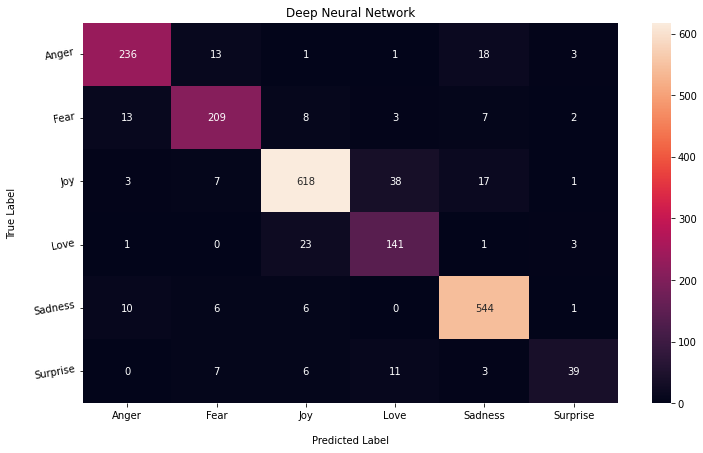

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(confusion_matrix(y_test, y_dnnfinal)
            ,annot=True,fmt='g')
plt.ylabel('True Label\n')
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5], ['Anger','Fear','Joy','Love','Sadness','Surprise'],rotation=10)
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5], ['Anger','Fear','Joy','Love','Sadness','Surprise'])
plt.xlabel('\nPredicted Label')
plt.title('Deep Neural Network')
plt.show()

In [ ]:
sentences = ["The children were especially delighted that there were enough cookies for each of them to have two.",
            "I'm so furious about the result",
            "I can't do it, I'm not ready to lose her, just leave me alone",
            "You never cease to amaze me with your weird obsession of art"]
for sentence in sentences:
    print(sentence)
    #text cleaning
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = sentence.lower().split() 

    sentence = [word for word in sentence if (word not in stop_words)]
    sentence = ' '.join(sentence) 

    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=max_length, truncating=trunc_type)
    result = label_encode.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))

    print('{} : {:.2f}%'.format(result, proba*100))
    print('')

The children were especially delighted that there were enough cookies for each of them to have two.
joy : 97.46%

I'm so furious about the result
anger : 76.96%

I can't do it, I'm not ready to lose her, just leave me alone
fear : 47.69%

You never cease to amaze me with your weird obsession of art
surprise : 45.44%



##Export Model DNN

In [ ]:
model.save("Mood Analysis Model.h5")

In [ ]:
new_model= tf.keras.models.load_model(filepath='/content/Mood Analysis Model.h5')

In [ ]:
def mood_check(sentences):
  for sentence in sentences:
    print(sentence)
    #text cleaning
    sentence = re.sub('[^a-zA-Z]', ' ', sentence) 
    sentence = sentence.lower().split() 

    sentence = [word for word in sentence if (word not in stop_words)] 
    sentence = ' '.join(sentence) 

    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=max_length, truncating=trunc_type)
    result = label_encode.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(new_model.predict(sentence))

    print('{} : {:.2f}%'.format(result, proba*100))
    print('')

In [ ]:
sentences = ["The children were especially delighted that there were enough cookies for each of them to have two.",
            "I'm so furious about the result",
            "I can't do it, I'm not ready to lose her, just leave me alone",
            "You never cease to amaze me with your weird obsession of art"]
mood_check(sentences)            

The children were especially delighted that there were enough cookies for each of them to have two.
joy : 97.46%

I'm so furious about the result
anger : 76.96%

I can't do it, I'm not ready to lose her, just leave me alone
fear : 47.69%

You never cease to amaze me with your weird obsession of art
surprise : 45.44%

